<a href="https://colab.research.google.com/github/GabrielMSchmidt/Algoritmo-CLONALG/blob/main/CLONALG_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [ ]:
pip install tsplib95

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
nx-cugraph-cu12 24.10.0 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.


In [ ]:
import numpy as np
from numpy.random import uniform
from typing import List
import tsplib95
import matplotlib.pyplot as plt

# Implementação CLONALG


In [ ]:
OPTIMAL_DISTANCE = 426

class Antibody:
  def __init__(self, carachteristics: np.array, afinity: float) -> None:
    self.carachteristics = carachteristics
    self.afinity = afinity

  def calculate_path_distance(self) -> float:
    return OPTIMAL_DISTANCE / self.afinity



class Population:
  def __init__(self, generations: int, population_size: int, selection_rate: int, clone_rate: int, replace_rate: int, distance_matrix: np.ndarray) -> None:
      self.generations = generations
      self.population_size = population_size
      self.selection_rate = selection_rate
      self.clone_rate = clone_rate
      self.replace_rate = replace_rate
      self.distance_matrix = distance_matrix
      self.antibodies = []


  def calculate_afinity(self, carachteristics: np.array) -> float:
    total_distance = sum(
        self.distance_matrix[carachteristics[i], carachteristics[i + 1]]
        for i in range(len(carachteristics) - 1)
    )
    total_distance += self.distance_matrix[carachteristics[-1], carachteristics[0]]

    return OPTIMAL_DISTANCE / total_distance



  def create_population(self, num_cities: int) -> None:
    for _ in range(self.population_size):
      carachteristics = np.random.permutation(num_cities)
      afinity = self.calculate_afinity(carachteristics)
      self.antibodies.append(Antibody(carachteristics = carachteristics, afinity = afinity))


  def clone(self) -> List[Antibody]:
    sorted_antibodies = sorted(self.antibodies, key=lambda ab: ab.afinity, reverse=True)
    selected_antibodies = sorted_antibodies[:self.selection_rate]

    clones = []
    for antibody in selected_antibodies:
      for _ in range(self.clone_rate):
        new_carachteristics = antibody.carachteristics.copy()
        clones.append(Antibody(new_carachteristics, antibody.afinity))
    return clones


  def hypermutate(self, clones: List[Antibody]) -> List[Antibody]:
    mutated_clones = []
    for clone in clones:
      new_carachteristics = clone.carachteristics.copy()

      mutation_count = int(
        1 + 2 * (1 - clone.afinity)
      )
      for _ in range(mutation_count):
        i, j = np.random.choice(len(new_carachteristics), size=2, replace=False)
        new_carachteristics[i], new_carachteristics[j] = new_carachteristics[j], new_carachteristics[i]

      mutated_clones.append(
        Antibody(
          carachteristics=new_carachteristics,
          afinity=self.calculate_afinity(new_carachteristics)
        )
      )
    return mutated_clones


  def selection(self, clones: List[Antibody]) -> None:
    sorted_clones = sorted(clones, key=lambda ab: ab.afinity, reverse=True)
    selected_clones = sorted_clones[:self.replace_rate]
    combined = self.antibodies + selected_clones
    combined = sorted(combined, key=lambda ab: ab.afinity, reverse=True)
    self.antibodies = combined[:self.population_size]


  def run(self, num_cities: int, verbose: bool = False) -> Antibody:
    """
    Executa o algoritmo CLONALG para o número de gerações especificado.

    :param num_cities: Número de cidades (dimensão da matriz de distâncias).
    :param verbose: Se True, imprime informações sobre cada geração.
    :return: O melhor anticorpo (solução) encontrado.
    """
    self.create_population(num_cities)
    # print("População inicial:")
    # for i, antibody in enumerate(population.antibodies):
    #   print(f"Anticorpo {i+1}: Afinidade = {antibody.afinity:.4f}")

    best_antibody = None
    for generation in range(self.generations):
      clones = self.clone()
      mutated_clones = self.hypermutate(clones)
      self.selection(mutated_clones)
      current_best = max(self.antibodies, key=lambda ab: ab.afinity)
      if best_antibody is None or current_best.afinity > best_antibody.afinity:
        best_antibody = current_best
      if verbose and int((generation+1) % (self.generations/10)) == 0:
        print(f"Geração: [{generation+1} / {self.generations}]  Melhor afinidade: {best_antibody.afinity:.4f}  Caminho: {best_antibody.calculate_path_distance():.2f}")

    return best_antibody



def load_distance_matrix(file_path: str) -> np.ndarray:
  problem = tsplib95.load(file_path)

  num_cities = len(list(problem.get_nodes()))
  distance_matrix = np.zeros((num_cities, num_cities))
  for i in range(num_cities):
    for j in range(num_cities):
      distance_matrix[i, j] = problem.get_weight(i + 1, j + 1)
  return distance_matrix

def display_distance_matrix(distance_matrix: np.ndarray) -> None:
    print("Matriz de Distâncias:")
    for i, row in enumerate(distance_matrix):
      formatted_row = " ".join(f"{dist:.0f}" for dist in row)
      print(f"Cidade {i + 1}: {formatted_row}")


# Execução

## Carregando Cidades

In [ ]:
distance_matrix = load_distance_matrix('/content/eil51.tsp')

display_distance_matrix(distance_matrix)

Matriz de Distâncias:
Cidade 1: 0 12 19 31 22 17 23 12 24 34 12 21 42 27 36 19 31 28 46 21 27 7 22 29 33 19 8 16 21 33 17 6 43 31 27 31 30 19 43 56 44 45 34 38 42 14 23 12 26 24 14
Cidade 2: 12 0 15 37 21 28 35 22 16 28 11 25 50 38 35 9 34 36 51 12 15 11 34 41 43 29 19 19 9 24 23 11 39 20 19 24 32 15 35 62 50 48 46 39 40 20 29 25 21 14 21
Cidade 3: 19 15 0 50 36 35 35 21 31 43 25 38 61 46 51 23 48 47 64 8 24 12 37 46 52 25 27 9 17 37 16 23 54 32 10 12 47 30 49 75 63 62 47 54 56 32 42 28 36 27 33
Cidade 4: 31 37 50 0 20 21 37 38 33 31 27 13 15 18 19 35 8 8 15 49 45 38 31 29 18 43 24 47 44 38 46 27 31 42 56 61 13 27 41 25 13 16 41 15 25 18 8 29 28 38 17
Cidade 5: 22 21 36 20 0 25 40 33 12 14 11 9 35 30 15 16 15 23 32 33 25 27 36 39 34 40 21 37 25 18 39 16 21 21 40 45 11 7 24 42 33 28 49 18 20 12 15 29 8 17 14
Cidade 6: 17 28 35 21 25 0 16 18 34 40 22 18 27 10 34 32 25 15 35 38 41 23 11 14 17 22 9 30 37 42 27 17 45 42 44 47 27 27 50 44 32 37 23 33 41 14 16 9 33 36 11
Cidade 7: 23 35 35 37

## Gráfico das Cidades


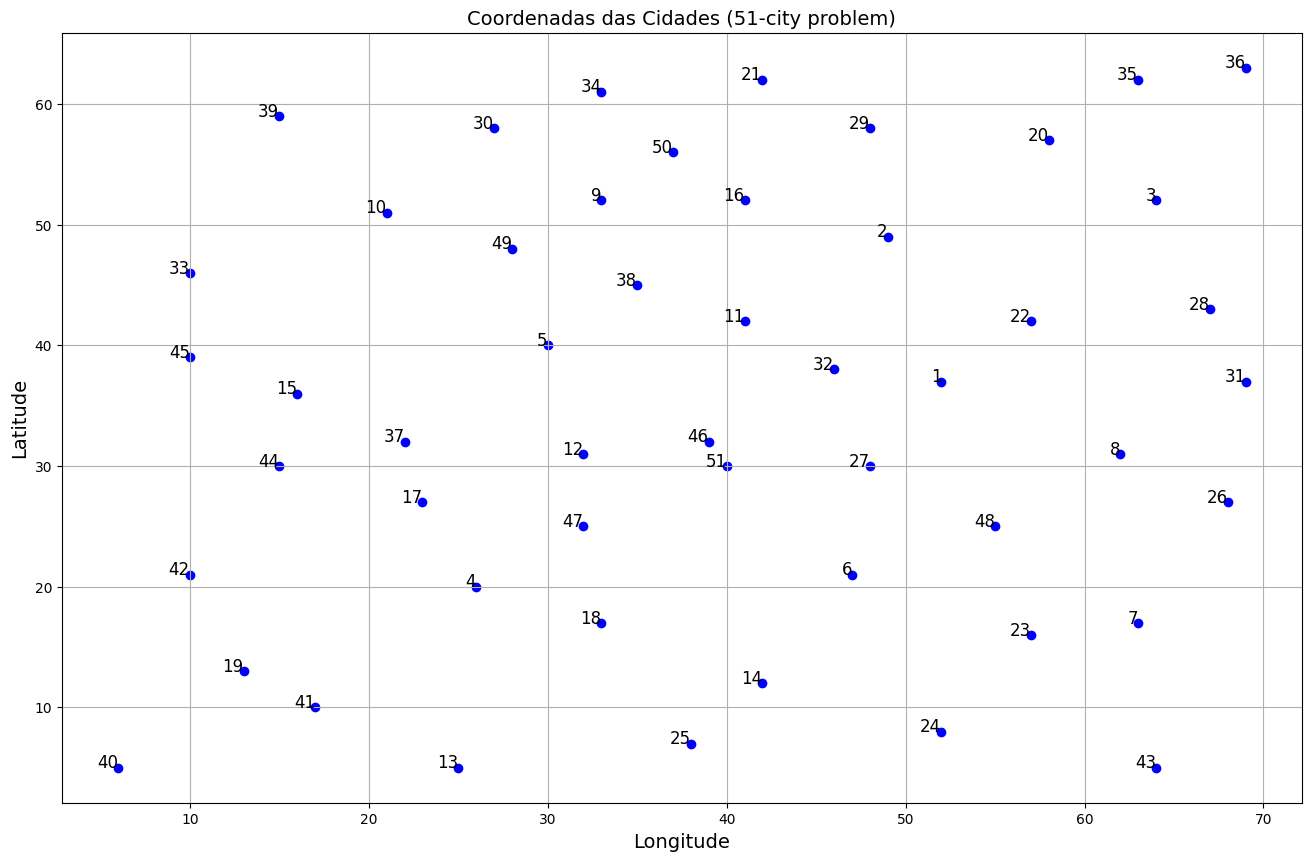

In [ ]:
cities = [
    (37, 52), (49, 49), (52, 64), (20, 26), (40, 30), (21, 47), (17, 63),
    (31, 62), (52, 33), (51, 21), (42, 41), (31, 32), (5, 25), (12, 42),
    (36, 16), (52, 41), (27, 23), (17, 33), (13, 13), (57, 58), (62, 42),
    (42, 57), (16, 57), (8, 52), (7, 38), (27, 68), (30, 48), (43, 67),
    (58, 48), (58, 27), (37, 69), (38, 46), (46, 10), (61, 33), (62, 63),
    (63, 69), (32, 22), (45, 35), (59, 15), (5, 6), (10, 17), (21, 10),
    (5, 64), (30, 15), (39, 10), (32, 39), (25, 32), (25, 55), (48, 28),
    (56, 37), (30, 40)
]
latitudes = [city[0] for city in cities]
longitudes = [city[1] for city in cities]

plt.figure(figsize=(16, 10))
plt.scatter(longitudes, latitudes, color='blue')

for i, city in enumerate(cities, start=1):
    plt.text(city[1], city[0], str(i), fontsize=12, ha='right')

plt.title('Coordenadas das Cidades (51-city problem)', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.grid(True)
plt.show()

## Execução do Algoritmo

In [ ]:
%%time
population = Population(
    generations=1000,
    population_size=200,
    selection_rate=10,
    clone_rate=5,
    replace_rate=50,
    distance_matrix=distance_matrix
)

best_solution = population.run(num_cities=distance_matrix.shape[0], verbose=True)

print("\nMelhor Solução Encontrada:")
print(f"Caminho: {best_solution.carachteristics}")
print(f"Distância Total: {best_solution.calculate_path_distance():.2f}")
print(f"Afinidade: {best_solution.afinity:.4f}")


Geração: [100 / 1000]  Melhor afinidade: 0.5253  Caminho: 811.00
Geração: [200 / 1000]  Melhor afinidade: 0.6534  Caminho: 652.00
Geração: [300 / 1000]  Melhor afinidade: 0.7717  Caminho: 552.00
Geração: [400 / 1000]  Melhor afinidade: 0.7963  Caminho: 535.00
Geração: [500 / 1000]  Melhor afinidade: 0.8337  Caminho: 511.00
Geração: [600 / 1000]  Melhor afinidade: 0.8386  Caminho: 508.00
Geração: [700 / 1000]  Melhor afinidade: 0.8419  Caminho: 506.00
Geração: [800 / 1000]  Melhor afinidade: 0.8419  Caminho: 506.00
Geração: [900 / 1000]  Melhor afinidade: 0.8419  Caminho: 506.00
Geração: [1000 / 1000]  Melhor afinidade: 0.8419  Caminho: 506.00

Melhor Solução Encontrada:
Caminho: [40 18 39 41 43 14 36 16  3 17  5 26 10 37 29  9 44 32 38 33 20 28 19 34
 35  2 27 25  6 42 23 22 47  0 31 45 50 46 11  4 48  8 49 15  1 21 30  7
 13 24 12]
Distância Total: 506.00
Afinidade: 0.8419
CPU times: user 2.95 s, sys: 27.7 ms, total: 2.98 s
Wall time: 2.96 s


## Gráfico da Solução

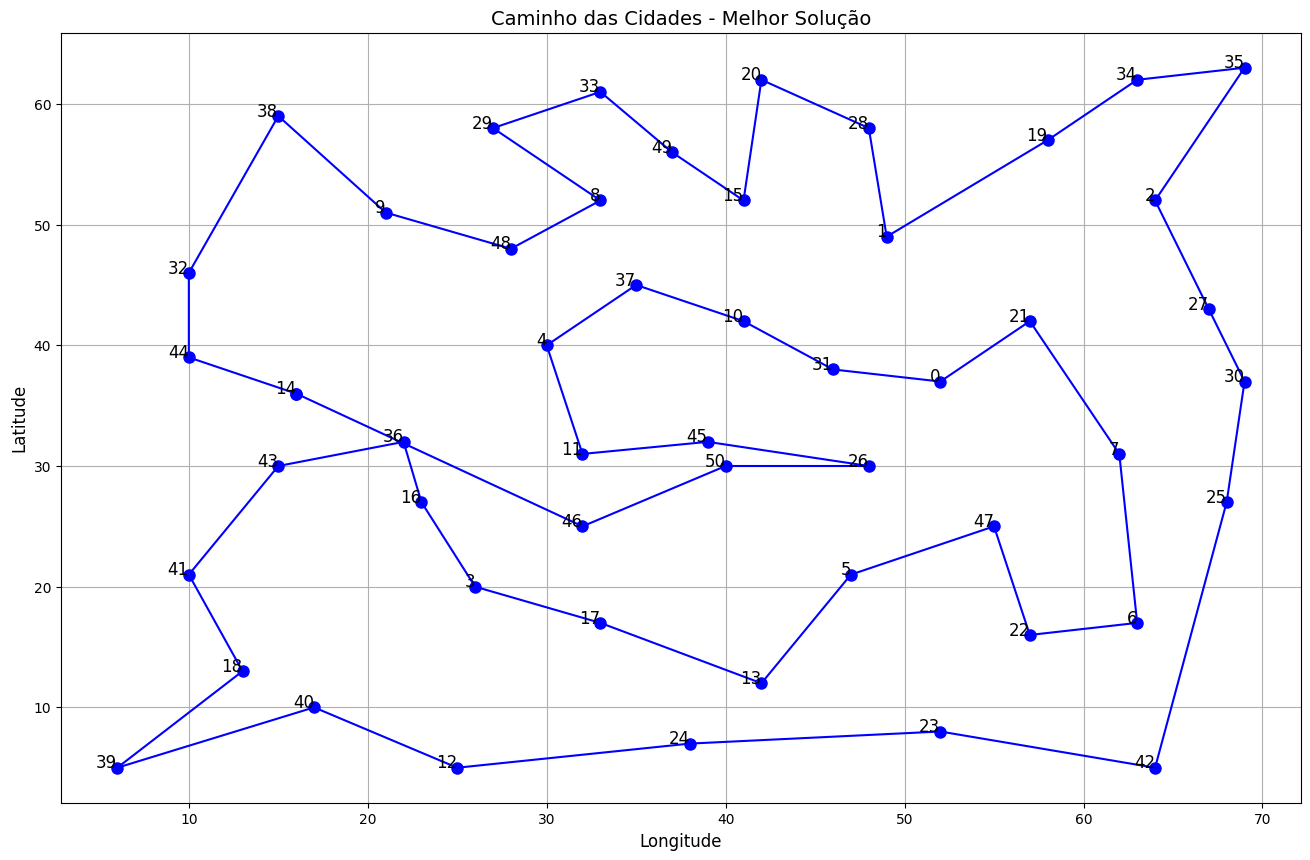

In [ ]:
path_latitudes = [latitudes[i] for i in best_solution.carachteristics]
path_longitudes = [longitudes[i] for i in best_solution.carachteristics]
plt.figure(figsize=(16, 10))

plt.plot(path_longitudes + [path_longitudes[0]], path_latitudes + [path_latitudes[0]], marker='o', color='b', linestyle='-', markersize=8)

for i, (lat, lon) in enumerate(zip(path_latitudes, path_longitudes)):
    plt.text(lon, lat, str(best_solution.carachteristics[i]), fontsize=12, ha='right')

plt.title('Caminho das Cidades - Melhor Solução', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.grid(True)
plt.show()